In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c digit-recognizer

  0% 0.00/15.3M [00:00<?, ?B/s]
100% 15.3M/15.3M [00:00<00:00, 1.15GB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile("/content/digit-recognizer.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()

In [5]:
data = pd.read_csv("/content/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#change to numpy
data_n= np.array(data)
np.random.shuffle(data_n)
m,n = data_n.shape
#transpose
data_train =data_n[1000:m].T
Y_train = data_train[0].reshape(1, -1)
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [7]:
def init_params():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5

  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5

  return W1, b1, W2, b2

In [8]:
def Relu(z, d=False):
  if not d:
    return np.maximum(z, 0)
  else :
    return z > 0

In [9]:
def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  return one_hot_Y

In [10]:
def softmax(z):
  A = np.exp(z) / sum(np.exp(z))
  return A

In [11]:
def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = Relu(Z1)

  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)

  return Z1, A1, Z2, A2

In [12]:
def back_prop(Z1,Z2, A1, A2, X, Y, W1, W2):
  one_hot_y = one_hot(Y)
  dZ2 = A2 - one_hot_y.T
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * Relu(Z1, d=True)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)
  return dW1, db1, dW2, db2

In [13]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2

  return W1, b1, W2, b2

In [14]:
def get_predictions(A2):
  return np.argmax(A2, 0)

In [15]:
def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size

In [16]:
def gradient_descent(X, Y, alpha, epochs):
  W1, b1, W2, b2  = init_params()
  for i in range(epochs):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = back_prop(Z1,Z2, A1, A2, X, Y, W1, W2)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

    if i % 10 == 0:
      print("Iteration: ", i)
      predictions = get_predictions(A2)
      print(get_accuracy(predictions, Y))
  return W1, b1, W2, b2

In [17]:
print("X_train shape:", X_train.shape)   # Expect (784, m)
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 100)

X_train shape: (784, 41000)
Iteration:  0
[2 3 9 ... 0 0 2] [[8 4 0 ... 1 8 1]]
0.13558536585365855
Iteration:  10
[2 3 3 ... 1 2 1] [[8 4 0 ... 1 8 1]]
0.30990243902439024
Iteration:  20
[6 0 0 ... 1 2 1] [[8 4 0 ... 1 8 1]]
0.41729268292682925
Iteration:  30
[6 0 0 ... 1 4 1] [[8 4 0 ... 1 8 1]]
0.48904878048780487
Iteration:  40
[6 0 0 ... 1 4 1] [[8 4 0 ... 1 8 1]]
0.5430731707317074
Iteration:  50
[6 0 0 ... 1 4 1] [[8 4 0 ... 1 8 1]]
0.5857560975609756
Iteration:  60
[6 0 0 ... 1 4 1] [[8 4 0 ... 1 8 1]]
0.616390243902439
Iteration:  70
[6 0 0 ... 1 5 1] [[8 4 0 ... 1 8 1]]
0.6391463414634146
Iteration:  80
[6 0 0 ... 1 5 1] [[8 4 0 ... 1 8 1]]
0.6581219512195122
Iteration:  90
[6 0 0 ... 1 5 1] [[8 4 0 ... 1 8 1]]
0.6753658536585366


In [18]:
def make_predictions(X, W1, b1, W2, b2):
  _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
  predictions = get_predictions(A2)
  return predictions

def test_predictions(index, W1, b1, W2, b2):
  current_image = X_train[:, index, None]
  prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
  label = Y_train[0, index]
  print("Prediction: ", prediction)
  print("Label: ", label)

  current_image = current_image.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show()

  def get_accuracy(predictions, Y):
    """
    predictions : (m,) int  — output of get_predictions(A2)
    Y           : (1, m) int
    """
    return np.mean(predictions == Y.flatten()) * 100

In [19]:
# ---- make a 10 % hold-out validation set ----
val_fraction = 0.1          # 10 % of the data
m            = X_train.shape[1]
val_size     = int(m * val_fraction)

# last val_size columns → validation
X_val = X_train[:, -val_size:]
Y_val = Y_train[:, -val_size:]

# remaining columns → new training set
X_train = X_train[:, :-val_size]
Y_train = Y_train[:, :-val_size]

print("Train  :", X_train.shape, Y_train.shape)
print("Val    :", X_val.shape,  Y_val.shape)


Train  : (784, 36900) (1, 36900)
Val    : (784, 4100) (1, 4100)


Iteration:  0
[2 4 7 ... 7 4 1] [[8 4 0 ... 2 4 8]]
0.10327913279132792
Iteration:  10
[2 2 7 ... 4 7 1] [[8 4 0 ... 2 4 8]]
0.21363143631436315
Iteration:  20
[2 2 7 ... 2 4 1] [[8 4 0 ... 2 4 8]]
0.28344173441734416
Iteration:  30
[2 2 7 ... 9 4 0] [[8 4 0 ... 2 4 8]]
0.34360433604336044
Iteration:  40
[2 9 7 ... 9 4 0] [[8 4 0 ... 2 4 8]]
0.3871273712737127
Iteration:  50
[2 9 0 ... 9 4 0] [[8 4 0 ... 2 4 8]]
0.4253116531165312
Iteration:  60
[2 9 0 ... 9 4 8] [[8 4 0 ... 2 4 8]]
0.4582926829268293
Iteration:  70
[2 2 0 ... 2 4 8] [[8 4 0 ... 2 4 8]]
0.4940650406504065
Iteration:  80
[2 4 0 ... 2 4 8] [[8 4 0 ... 2 4 8]]
0.5236043360433604
Iteration:  90
[2 4 0 ... 2 4 8] [[8 4 0 ... 2 4 8]]
0.5515718157181572
Prediction:  [2]
Label:  8


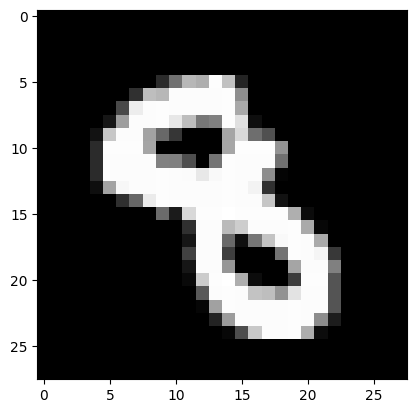

Prediction:  [7]
Label:  7


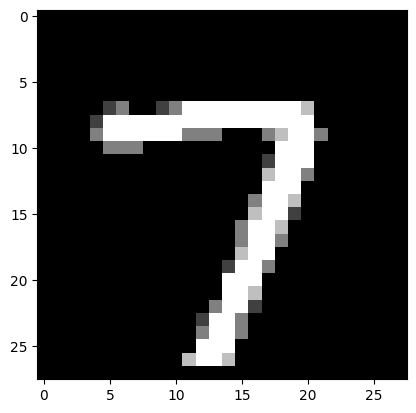

Prediction:  [6]
Label:  6


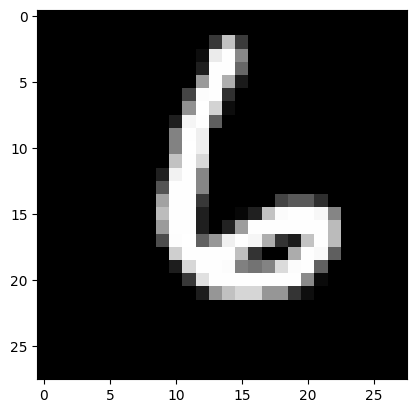

[2 4 0 ... 2 4 8] [[8 4 0 ... 2 4 8]]
Training accuracy: 0.58%
[2 6 8 ... 1 0 1] [[2 2 8 ... 1 8 1]]
Validation accuracy: 0.58%


In [20]:
# 1. Train (or load) parameters
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, alpha=0.10, epochs=100)

# 2. Check a few random images
for idx in [0, 123, 4567]:
    test_predictions(idx, W1, b1, W2, b2)

# 3. Evaluate accuracy on the whole training set
train_preds = make_predictions(X_train, W1, b1, W2, b2)
print("Training accuracy: {:.2f}%".format(get_accuracy(train_preds, Y_train)))

# 4. Do the same on a held-out validation/test set if you have one
val_preds = make_predictions(X_val, W1, b1, W2, b2)
print("Validation accuracy: {:.2f}%".format(get_accuracy(val_preds, Y_val)))


In [21]:
import tensorflow as tf
import cv2 as cv

In [22]:
!kaggle datasets download tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 56% 122M/218M [00:00<00:00, 1.27GB/s]
100% 218M/218M [00:00<00:00, 843MB/s] 


In [23]:
import zipfile
zip_ref = zipfile.ZipFile("/content/cat-and-dog.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()

In [24]:
import random
import os
import matplotlib.pyplot as mpimg

def check_image(name="cats", return_img=False):
  files = os.listdir(f"/content/training_set/training_set/{name}")
  length = len(files)
  r= random.randint(0, length-1)
  img = mpimg.imread(f"/content/training_set/training_set/{name}/{files[r]}")

  if not return_img:
    plt.imshow(img)
    plt.show()
    print(img.shape)
  else:
    return img



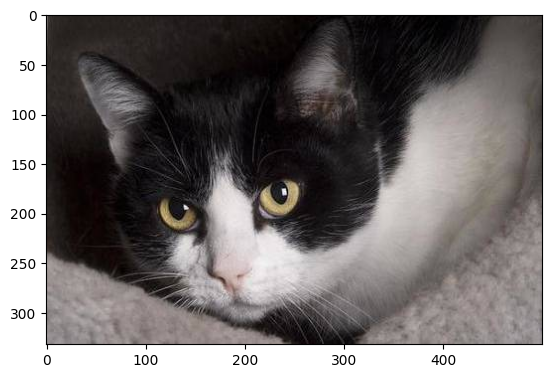

(332, 500, 3)


In [25]:
check_image(name="cats")

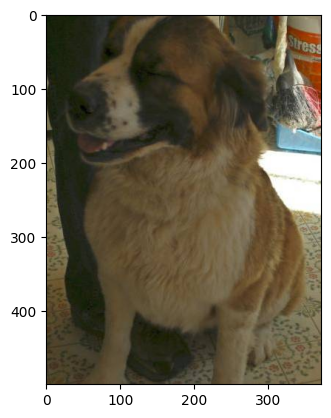

(500, 372, 3)


In [26]:
check_image(name="dogs")

In [27]:
train_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
test_validate_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

train_data = train_data_generator.flow_from_directory(directory="/content/training_set/training_set", batch_size=32, target_size=(256,256), class_mode="binary", seed=16)
test_data = test_validate_data_generator.flow_from_directory(directory="/content/test_set/test_set", batch_size=32, target_size=(256,256), class_mode="binary", seed=16)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [28]:
"""
InputLayer: (256,256,3) -> (x,y,z)
Hidden Layer:
-conv2d
-conv2d
-maxpool2d
-conv2d
-conv2d
-maxpool2d
-flatten

Output Layer: 2(dog  + cat)

"""

model_1 = tf.keras.Sequential([
    #input layer
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    #hidden layers
    tf.keras.layers.Conv2D(64, (1,1), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    #OUTPUT LAYERS
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5), #REGULARIZATION
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"])

steps_per_epoch = train_data.samples
validation_steps = test_data.samples

#Train the model
base_history = model_1.fit(train_data,
                           epochs=10,
                           steps_per_epoch=steps_per_epoch,
                           validation_data=test_data,
                           validation_steps=validation_steps)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 251/8005 ━━━━━━━━━━━━━━━━━━━━ 11:12 87ms/step - accuracy: 0.5302 - loss: 0.7930

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8005/8005 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.5523 - loss: 0.7031 - val_accuracy: 0.6238 - val_loss: 0.6423
Epoch 2/10
8005/8005 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.6308 - loss: 0.6410 - val_accuracy: 0.6490 - val_loss: 0.6159
Epoch 3/10
8005/8005 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.7053 - loss: 0.5692 - val_accuracy: 0.7232 - val_loss: 0.5460
Epoch 4/10
8005/8005 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.7612 - loss: 0.5012 - val_accuracy: 0.7400 - val_loss: 0.5180
Epoch 5/10
8005/8005 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.7994 - loss: 0.4332 - val_accuracy: 0.7494 - val_loss: 0.5151
Epoch 6/10
8005/8005 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.8425 - loss: 0.3559 - val_accuracy: 0.7350 - val_loss: 0.6176
Epoch 7/10
8005/8005 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8685 - loss: 0.2931 - val_accuracy: 0.7563 - val_loss: 0.5837
Epoch 8/10
8005/8005 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9029 - loss: 0.2263 - val

In [37]:
#get image from URL
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

def predict_from_url(url):
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))

  #resize image
  img_ = np.array(img)
  img_ = tf.image.resize(img_, (256,256))
  img_ = img_ / 255.0 # Normalize pixel values to [0,1]
  img_ = np.expand_dims(img_, axis=0) # shape becomes (1,512,512,3)
  print(img_.shape)

  #prediction with new image
  prediction = model_1.predict(img_)
  print(prediction)

  if prediction < 0.5:
    print("Prediction: This is a Cat")
  else:
    print("Prediction: This is a Dog")

  #display image
  img = Image.open(BytesIO(response.content))
  plt.imshow(img)
  plt.show()

(1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
[[0.00437603]]
Prediction: This is a Cat


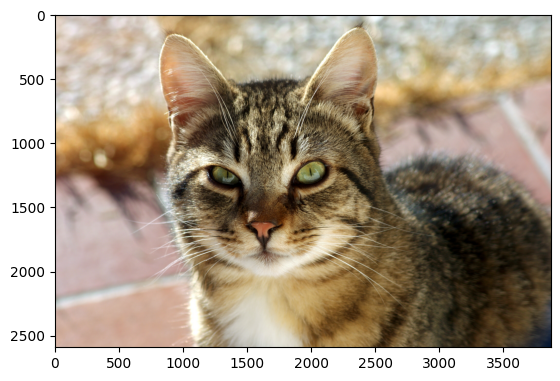

In [39]:
predict_from_url("https://upload.wikimedia.org/wikipedia/commons/7/74/A-Cat.jpg")

(1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.998317]]
Prediction: This is a Dog


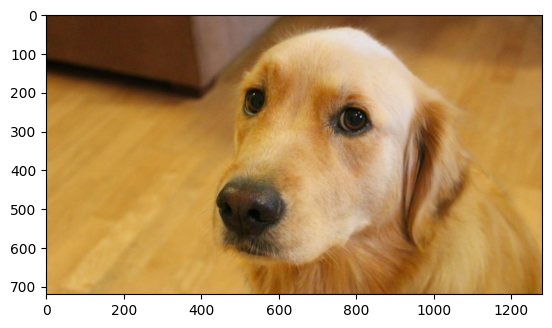

In [46]:
predict_from_url("https://i.ytimg.com/vi/SfLV8hD7zX4/maxresdefault.jpg")